# 实证：CPI & 失业率的关系

### 一、时序分解 & 统计性考察

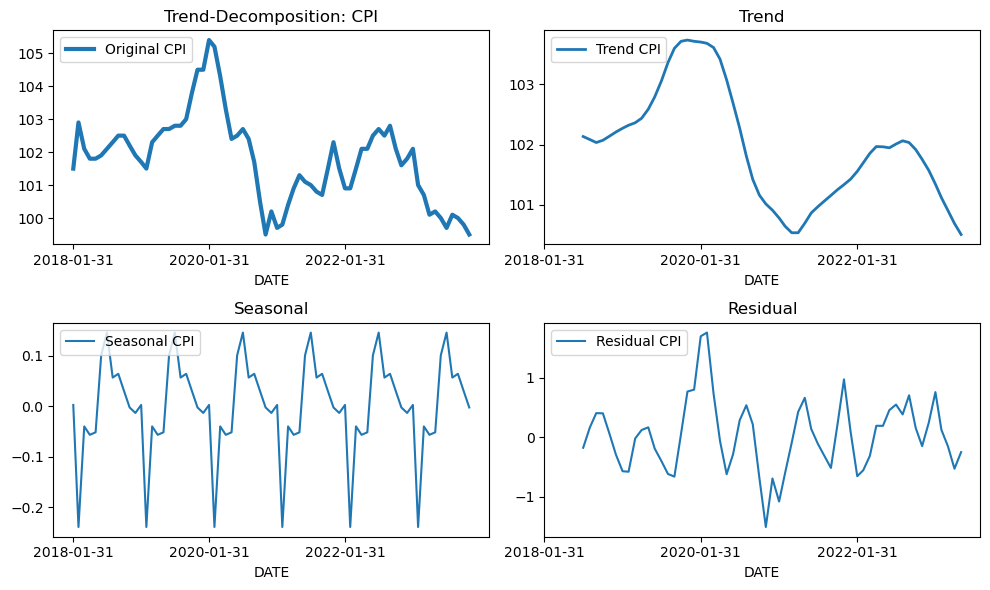

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 设置日期列为datetime类型，并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 进行时序分解
cpi_decomposition = seasonal_decompose(df['CPI'], model='additive', period=12)  # 设置季节性周期为12个月
unemployment_decomposition = seasonal_decompose(df['U'], model='additive', period=12)

# 绘制时序分解图
plt.figure(figsize=(10, 6))

# 绘制第一个子图
plt.subplot(2, 2, 1)
plt.plot(df['CPI'], label='Original CPI', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Trend-Decomposition: CPI')

# 绘制第二个子图
plt.subplot(2, 2, 2)
plt.plot(cpi_decomposition.trend, label='Trend CPI', linewidth=2)
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Trend')

# 绘制第三个子图
plt.subplot(2, 2, 3)
plt.plot(cpi_decomposition.seasonal, label='Seasonal CPI')
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Seasonal')

# 绘制第四个子图
plt.subplot(2, 2, 4)
plt.plot(cpi_decomposition.resid, label='Residual CPI')
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Residual')

plt.tight_layout()
plt.show()


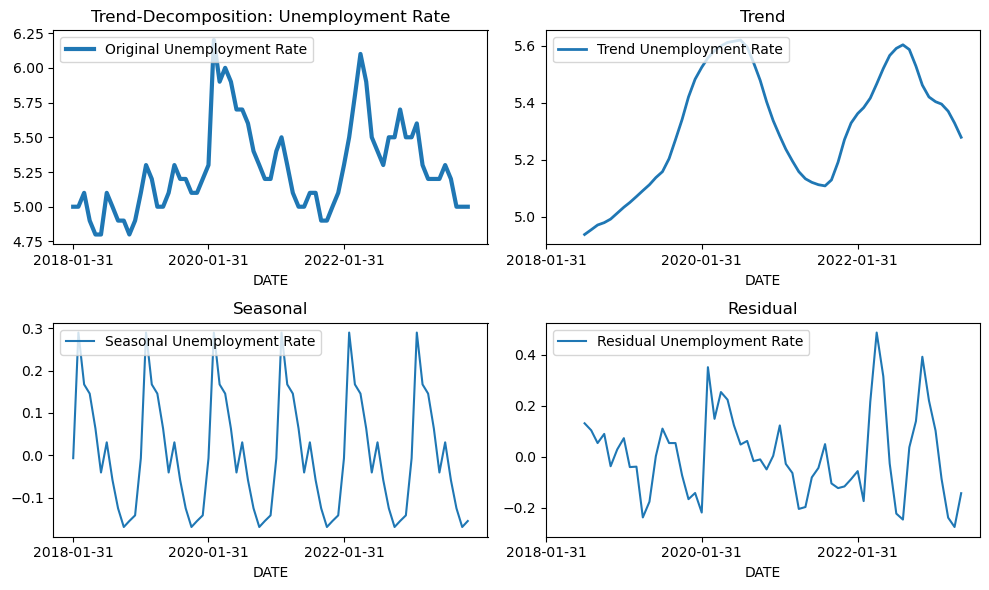

In [2]:
# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 设置日期列为datetime类型，并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 进行时序分解
cpi_decomposition = seasonal_decompose(df['CPI'], model='additive', period=12)
unemployment_decomposition = seasonal_decompose(df['U'], model='additive', period=12)

plt.figure(figsize=(10, 6))

# 绘制第一个子图
plt.subplot(2, 2, 1)
plt.plot(df['U'], label='Original Unemployment Rate', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Trend-Decomposition: Unemployment Rate')

# 绘制第二个子图
plt.subplot(2, 2, 2)
plt.plot(unemployment_decomposition.trend, label='Trend Unemployment Rate', linewidth=2)
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Trend')

# 绘制第三个子图
plt.subplot(2, 2, 3)
plt.plot(unemployment_decomposition.seasonal, label='Seasonal Unemployment Rate')
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Seasonal')

# 绘制第四个子图
plt.subplot(2, 2, 4)
plt.plot(unemployment_decomposition.resid, label='Residual Unemployment Rate')
plt.legend(loc='upper left')
plt.xlabel('DATE')
plt.xticks(df.index[::24])  # 设置横坐标间隔为12个月
plt.title('Residual')

plt.tight_layout()
plt.show()


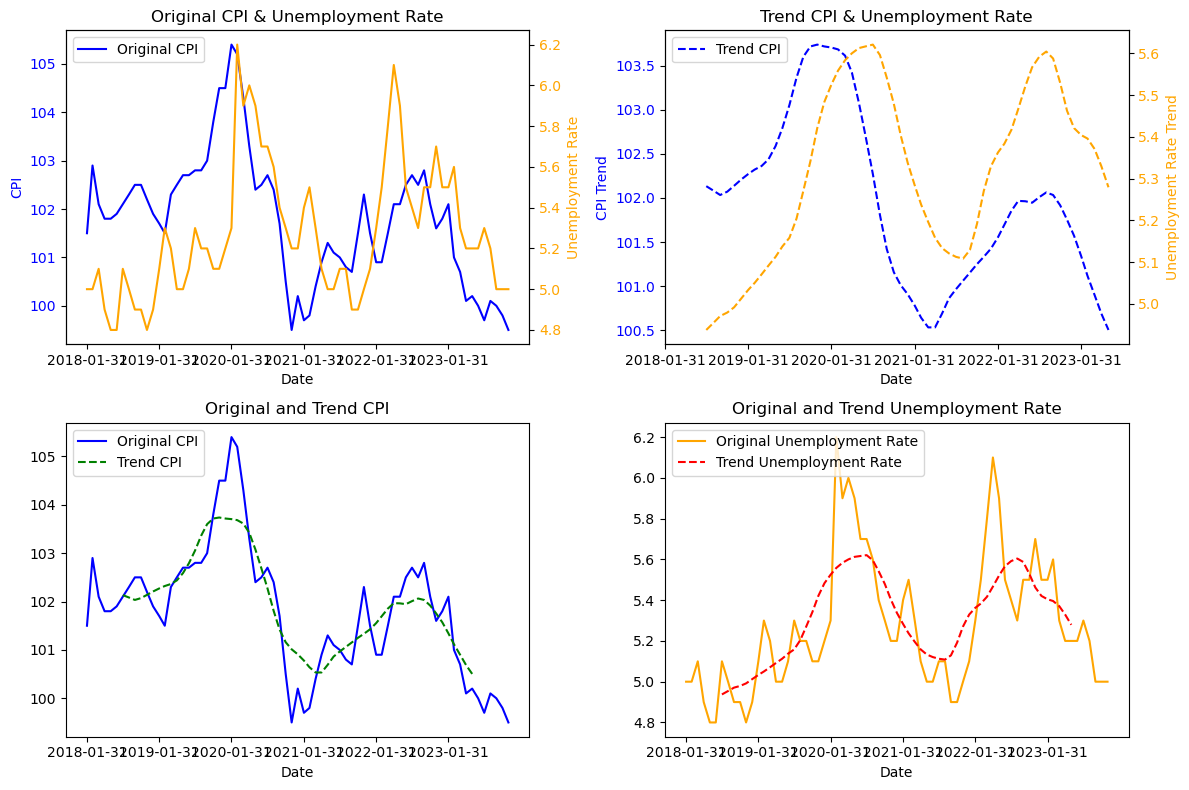

Correlation of Trends: 0.21216489150686318


In [3]:
# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 设置日期列为datetime类型，并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


# 绘制四张图
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# 绘制CPI & Unemployment Rate的Original图
axes[0, 0].plot(df['CPI'], label='Original CPI', color='blue')
axes[0, 0].set_ylabel('CPI', color='blue')
axes[0, 0].tick_params(axis='y', labelcolor='blue')

# 创建一个共享横坐标轴但有不同纵坐标轴的轴
ax2 = axes[0, 0].twinx()
ax2.plot(df['U'], label='Original Unemployment Rate', color='orange')
ax2.set_ylabel('Unemployment Rate', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

axes[0, 0].set_title('Original CPI & Unemployment Rate')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_xticks(df.index[::12])  # 设置横坐标间隔为12个月
axes[0, 0].legend(loc='upper left')

# 绘制CPI & Unemployment Rate的Trend图
axes[0, 1].plot(cpi_decomposition.trend, label='Trend CPI', linestyle='dashed', color='blue')
axes[0, 1].set_ylabel('CPI Trend', color='blue')
axes[0, 1].tick_params(axis='y', labelcolor='blue')

# 创建一个共享横坐标轴但有不同纵坐标轴的轴
ax3 = axes[0, 1].twinx()
ax3.plot(unemployment_decomposition.trend, label='Trend Unemployment Rate', linestyle='dashed', color='orange')
ax3.set_ylabel('Unemployment Rate Trend', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

axes[0, 1].set_title('Trend CPI & Unemployment Rate')
axes[0, 1].set_xlabel('Date')
axes[0, 1].set_xticks(df.index[::12])  # 设置横坐标间隔为12个月
axes[0, 1].legend(loc='upper left')


# 绘制CPI的Original和Trend图
axes[1, 0].plot(df['CPI'], label='Original CPI', color='blue')
axes[1, 0].plot(cpi_decomposition.trend, label='Trend CPI', linestyle='dashed', color='green')
axes[1, 0].set_title('Original and Trend CPI')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_xticks(df.index[::12])  # 设置横坐标间隔为12个月
axes[1, 0].legend(loc='upper left')

# 绘制Unemployment Rate的Original和Trend图
axes[1, 1].plot(df['U'], label='Original Unemployment Rate', color='orange')
axes[1, 1].plot(unemployment_decomposition.trend, label='Trend Unemployment Rate', linestyle='dashed', color='red')
axes[1, 1].set_title('Original and Trend Unemployment Rate')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_xticks(df.index[::12])  # 设置横坐标间隔为12个月
axes[1, 1].legend(loc='upper left')

plt.tight_layout()
plt.show()

correlation_trend_addictive = cpi_decomposition.trend.corr(unemployment_decomposition.trend)
print(f"Correlation of Trends: {correlation_trend_addictive}")



 ##### 若对CPI进行期数滞后，趋势图重叠会不会更加相似？（也就是CPI对失业率的影响存在滞后效应：当期CPI影响后一期失业率）

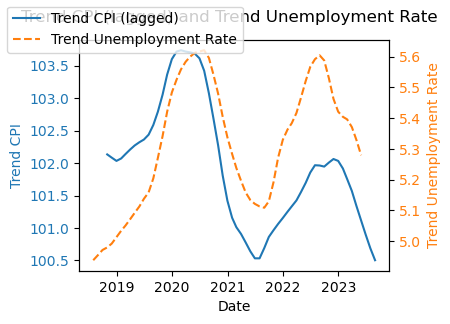

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 设置日期列为datetime类型，并设置为索引
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 进行CPI和失业率的趋势分解（需要您先定义cpi_decomposition和unemployment_decomposition）
# 以下为示例，实际使用时，请根据您的具体情况进行修改
from statsmodels.tsa.seasonal import seasonal_decompose

cpi_decomposition = seasonal_decompose(df['CPI'], period=12)
unemployment_decomposition = seasonal_decompose(df['U'], period=12)

# 对CPI的Trend进行一期滞后
cpi_trend_lagged = cpi_decomposition.trend.shift(3)

# 绘制时间序列图，使用左右两个纵坐标轴
fig, ax1 = plt.subplots(figsize=(4, 3))

# Plot Trend CPI
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Trend CPI', color=color)
ax1.plot(cpi_trend_lagged, linestyle='-', color=color, label='Trend CPI (lagged)')
ax1.tick_params(axis='y', labelcolor=color)

# 使用第二个纵坐标轴
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Trend Unemployment Rate', color=color)
ax2.plot(unemployment_decomposition.trend, linestyle='--', color=color, label='Trend Unemployment Rate')
ax2.tick_params(axis='y', labelcolor=color)

# 添加标签
fig.suptitle('Trend CPI (lagged) and Trend Unemployment Rate')
fig.legend(loc='upper left')
plt.show()


##  二、计量：协整检验

### Johansen检验

In [5]:

import pandas as pd

df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

'''
johansan检验
'''
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_coint_rank

# 提取 CPI 和失业率列
cpi = df.iloc[:, 2]
unemployment_rate = df.iloc[:, 3]

# Run Johansen cointegration test
johansen_result = coint_johansen(pd.concat([cpi, unemployment_rate], axis=1), det_order=0, k_ar_diff=2)

# 打印测试结果
print("Eigenvalues:", johansen_result.eig)
print("Trace statistic:", johansen_result.lr1)
print("Critical values :", johansen_result.cvt)
print("Eigenvalue statistics :", johansen_result.cvm)



Eigenvalues: [0.18500511 0.05860302]
Trace statistic: [18.01753826  4.10654432]
Critical values : [[13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
Eigenvalue statistics : [[12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]


In [6]:
import pandas as pd
from statsmodels.tsa.stattools import coint

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 选择需要进行协整检验的列
cpi_series = df['CPI']
unemployment_series = df['U']

# 进行协整检验
result = coint(cpi_series, unemployment_series,trend='n')

# 输出协整检验结果
print("协整检验统计量: ", result[0])
print("p值: ", result[1])
print("临界值(1%水平): ", result[2][0])
print("临界值(5%水平): ", result[2][1])
print("临界值(10%水平): ", result[2][2])

# 判断协整关系
if result[1] < 0.05:
    print("CPI和U有协整关系")
else:
    print("CPI和U没有协整关系")


协整检验统计量:  -3.008362767685904
p值:  0.026426779576130297
临界值(1%水平):  nan
临界值(5%水平):  nan
临界值(10%水平):  nan
CPI和U有协整关系


#### 确认协整向量

In [7]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# 进行Johansen协整检验
result_johansen = coint_johansen(df[['CPI', 'U']].values, det_order=0, k_ar_diff=1)

# 输出结果
print("协整关系的特征值: ", result_johansen.eig)
print("协整关系的特征向量: ", result_johansen.evec)

# 找到协整向量
cointegration_vector = result_johansen.evec[:, 0]  # 这里选择第一个协整向量
print("协整向量: ", cointegration_vector)


协整关系的特征值:  [0.12897103 0.04862106]
协整关系的特征向量:  [[ 0.45056412 -0.70248424]
 [-3.26216716 -1.04872957]]
协整向量:  [ 0.45056412 -3.26216716]


#### 协整向量检验_新变量是否平稳

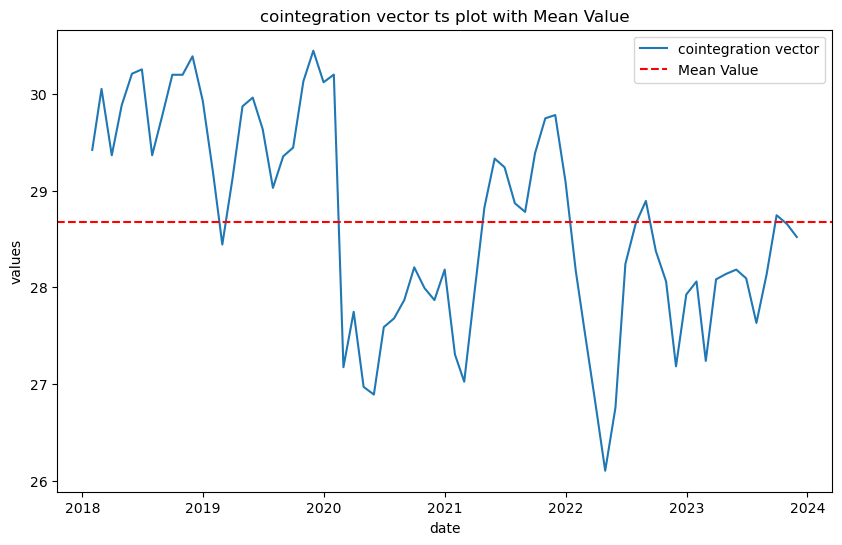

新变量的均值:  28.67173729273239

ADF Statistic:  -3.0503365536645606
p value:  0.03045356089463036
Critical Values(1%水平):  -3.528889992207215
Critical Values(5%水平):  -2.9044395987933362
Critical Values(10%水平):  -2.589655654274312

新变量是平稳的


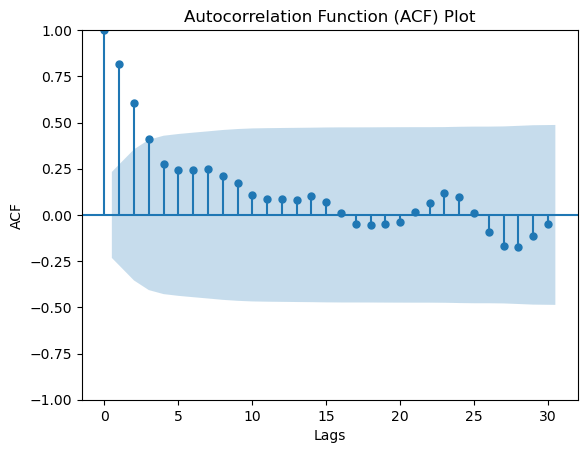

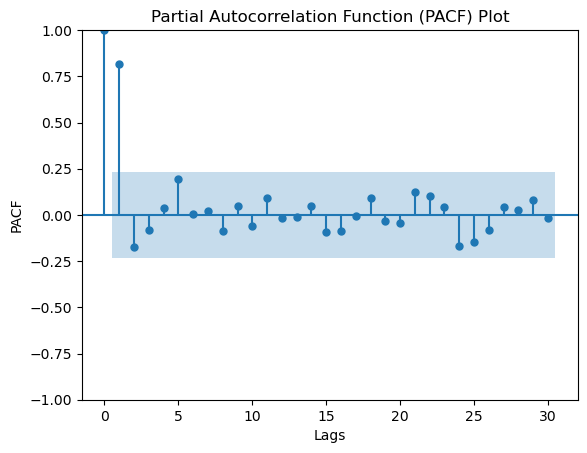

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller, acf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 原始变量
cpi_series = df['CPI']
unemployment_series = df['U']

# 协整向量
cointegration_vector = np.array([0.45056412, -3.26216716])

# 构建新的平稳时间序列
new_variable = np.dot(df[['CPI', 'U']].values, cointegration_vector)

# 计算均值
mean_value = np.mean(new_variable)

# 绘制时间序列图并标注均值
plt.figure(figsize=(10, 6))
plt.plot(df['date'], new_variable, label='cointegration vector')
plt.axhline(y=mean_value, color='r', linestyle='--', label='Mean Value')
plt.title('cointegration vector ts plot with Mean Value')
plt.xlabel('date')
plt.ylabel('values')
plt.legend()
plt.show()

print("新变量的均值: ", mean_value)


# 进行ADF检验
result_adf = adfuller(new_variable,autolag="AIC")
print("\nADF Statistic: ", result_adf[0])
print("p value: ", result_adf[1])
print("Critical Values(1%水平): ", result_adf[4]['1%'])
print("Critical Values(5%水平): ", result_adf[4]['5%'])
print("Critical Values(10%水平): ", result_adf[4]['10%'])

# 判断平稳性
if result_adf[1] < 0.05:
    print("\n新变量是平稳的")
else:
    print("新变量不是平稳的")
    
# 绘制ACF图

plot_acf(new_variable, lags=30)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lags')
plt.ylabel('ACF')
plt.show()

# 绘制PACF图
plot_pacf(new_variable, lags=30)
plt.title('Partial Autocorrelation Function (PACF) Plot')
plt.xlabel('Lags')
plt.ylabel('PACF')
plt.show()

## 其他：VAR检验


### （1）ADF检验

In [9]:
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 选择CPI和失业率列
df_var = df[['date', 'CPI', 'U']]

# 将日期列设置为索引
df_var.set_index('date', inplace=True)


# ADF检验函数
def adf_test(series, name=''):
    result = adfuller(series, autolag='AIC')
    print(f'\nADF Test for {name}:')
    print(f'ADF Statistic: {result[0]}')
    print(f'p-value: {result[1]}')
    print(f'Critical Values: {result[4]}')
    
    if result[1] <= 0.05:
        print("Reject the null hypothesis. The data is stationary.")
    else:
        print("Fail to reject the null hypothesis. The data is non-stationary.")

# 对CPI进行ADF检验
adf_test(df_var['CPI'], name='CPI')

# 对失业率进行ADF检验
adf_test(df_var['U'], name='Unemployment Rate')

df_diff = df.diff().dropna()  # Difference the DataFrame, dropping NaN values

adf_test(df_diff['CPI'], name='CPI (Differenced)')
adf_test(df_diff['U'], name='U (Differenced)')



# 描述性统计
print("\nDescriptive Statistics:")
print(df_var.describe())
print("\nDescriptive Statistics (Differenced):")
print(df_diff.describe())



# 添加截距项
df_diff['const'] = 1

# 设置自变量和因变量
X = df_diff['CPI']
y = df_diff['U']

# 拟合OLS模型
model = OLS(y, add_constant(X)).fit()

# 打印回归结果摘要
print("\n")
print("对差分后数据进行线性回归检验，delta_CPI 为自变量")
print(model.summary())



ADF Test for CPI:
ADF Statistic: -0.6108242784752808
p-value: 0.868517377302284
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Fail to reject the null hypothesis. The data is non-stationary.

ADF Test for Unemployment Rate:
ADF Statistic: -2.81003448782521
p-value: 0.05685464725301926
Critical Values: {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}
Fail to reject the null hypothesis. The data is non-stationary.

ADF Test for CPI (Differenced):
ADF Statistic: -4.286297263304056
p-value: 0.00046911930331754084
Critical Values: {'1%': -3.548493559596539, '5%': -2.912836594776334, '10%': -2.594129155766944}
Reject the null hypothesis. The data is stationary.

ADF Test for U (Differenced):
ADF Statistic: -7.566056484587555
p-value: 2.923773720820978e-11
Critical Values: {'1%': -3.528889992207215, '5%': -2.9044395987933362, '10%': -2.589655654274312}
Reject the null hypothesis. The data is stationary.

Descri

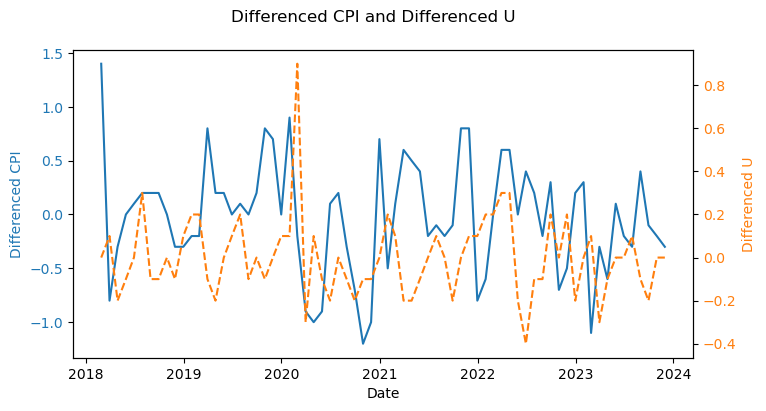

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 选择CPI和失业率列
df_var = df[['date', 'CPI', 'U']]

# 将日期列设置为索引
df_var.set_index('date', inplace=True)

# 对CPI和失业率进行一阶差分
df_diff = df_var.diff().dropna()

# 绘制时间序列图，使用左右两个纵坐标轴
fig, ax1 = plt.subplots(figsize=(8, 4))

# Plot differenced CPI
color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Differenced CPI', color=color)
ax1.plot(df_diff['CPI'], linestyle='-', color=color)
ax1.tick_params(axis='y', labelcolor=color)

# 使用第二个纵坐标轴
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Differenced U', color=color)
ax2.plot(df_diff['U'], linestyle='--', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# 添加标签
fig.suptitle('Differenced CPI and Differenced U')
plt.show()


### VAR方程

In [11]:
import pandas as pd
from statsmodels.tsa.api import VAR

# 读取Excel文件
df = pd.read_excel('/Users/macbookairm1/Desktop/0-DATA.xlsx')

# 选择CPI和失业率列
df_var = df[['date', 'CPI', 'U']]

# 将日期列设置为索引
df_var.set_index('date', inplace=True)

# 直接进行差分处理
df_var_diff = df_var.diff().dropna()

# 拟合VAR模型
model = VAR(df_var_diff)
results = model.fit()

# 进行模型选择，选择最优的滞后阶数
best_order = model.select_order(maxlags=12)
print("Best VAR Order:", best_order.summary())
optimal_lag = best_order.selected_orders['aic']

# 拟合VAR模型，使用最优的滞后阶数
model = VAR(df_var_diff)
results = model.fit(maxlags=optimal_lag)

# 打印模型的系数表
print(results.summary())

Best VAR Order:  VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       -4.476     -4.405*     0.01138     -4.448*
1      -4.498*      -4.285    0.01114*      -4.415
2       -4.387      -4.031     0.01245      -4.248
3       -4.300      -3.802     0.01360      -4.106
4       -4.310      -3.671     0.01350      -4.061
5       -4.266      -3.485     0.01417      -3.962
6       -4.151      -3.227     0.01599      -3.791
7       -4.053      -2.987     0.01779      -3.638
8       -3.953      -2.746     0.01988      -3.483
9       -3.930      -2.580     0.02065      -3.404
10      -3.888      -2.396     0.02194      -3.307
11      -4.008      -2.374     0.01991      -3.372
12      -4.272      -2.495     0.01575      -3.580
--------------------------------------------------
  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:       

/Users/macbookairm1/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
/Users/macbookairm1/anaconda3/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


### 脉冲响应函数

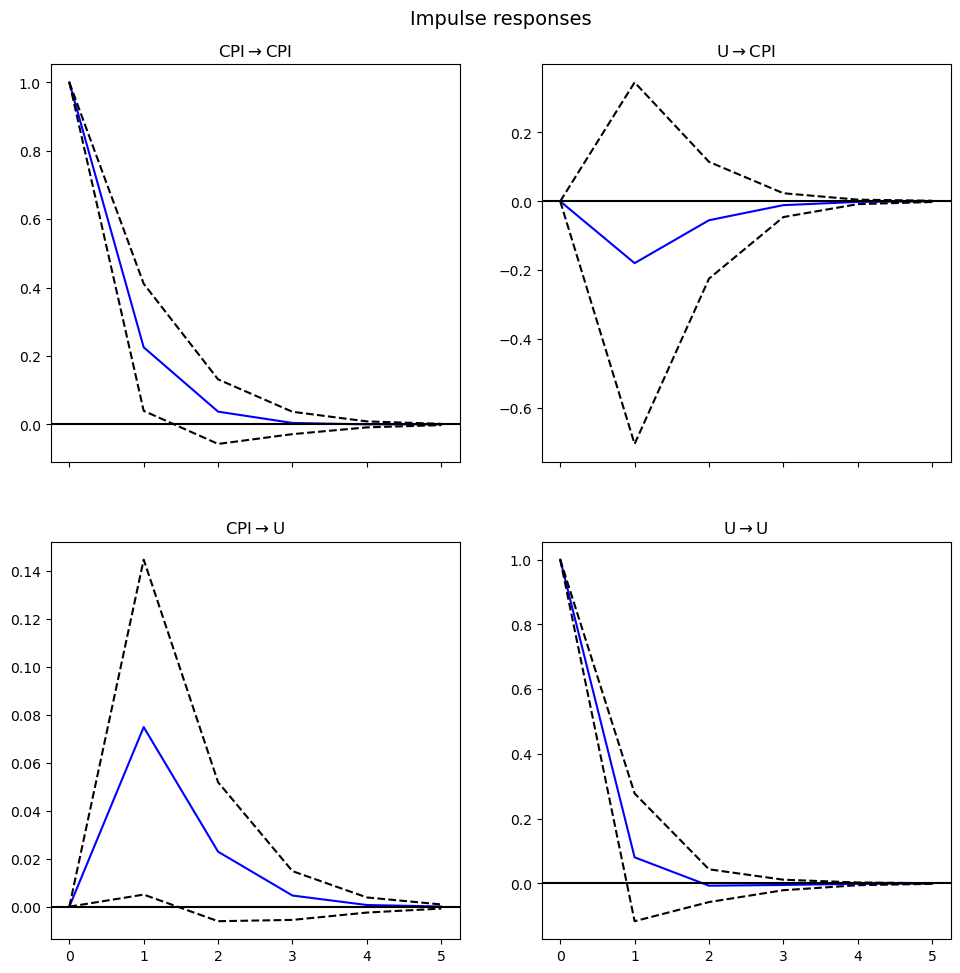

In [12]:

# 打印模型的脉冲响应函数
irf = results.irf(5)

irf.plot(orth=False, signif=0.1)
plt.show()


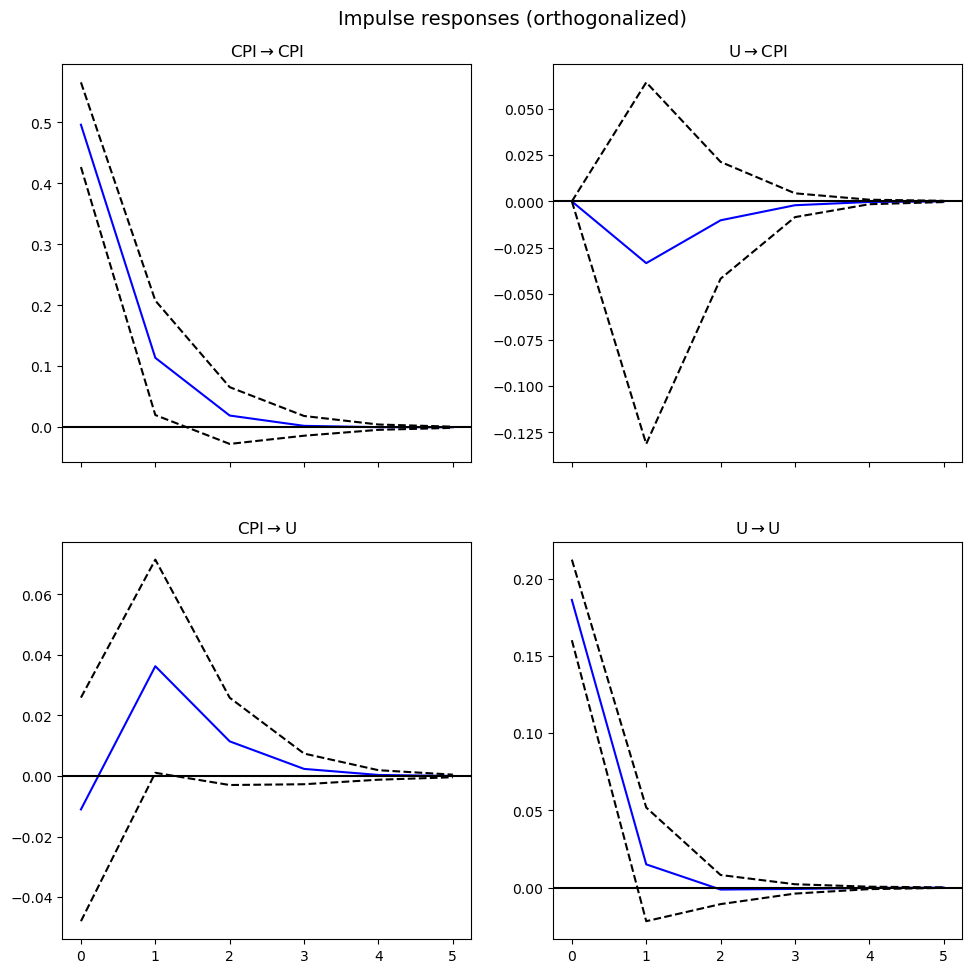

In [13]:
irf = results.irf(5)
irf.plot(orth=True, signif=0.1)
plt.show()

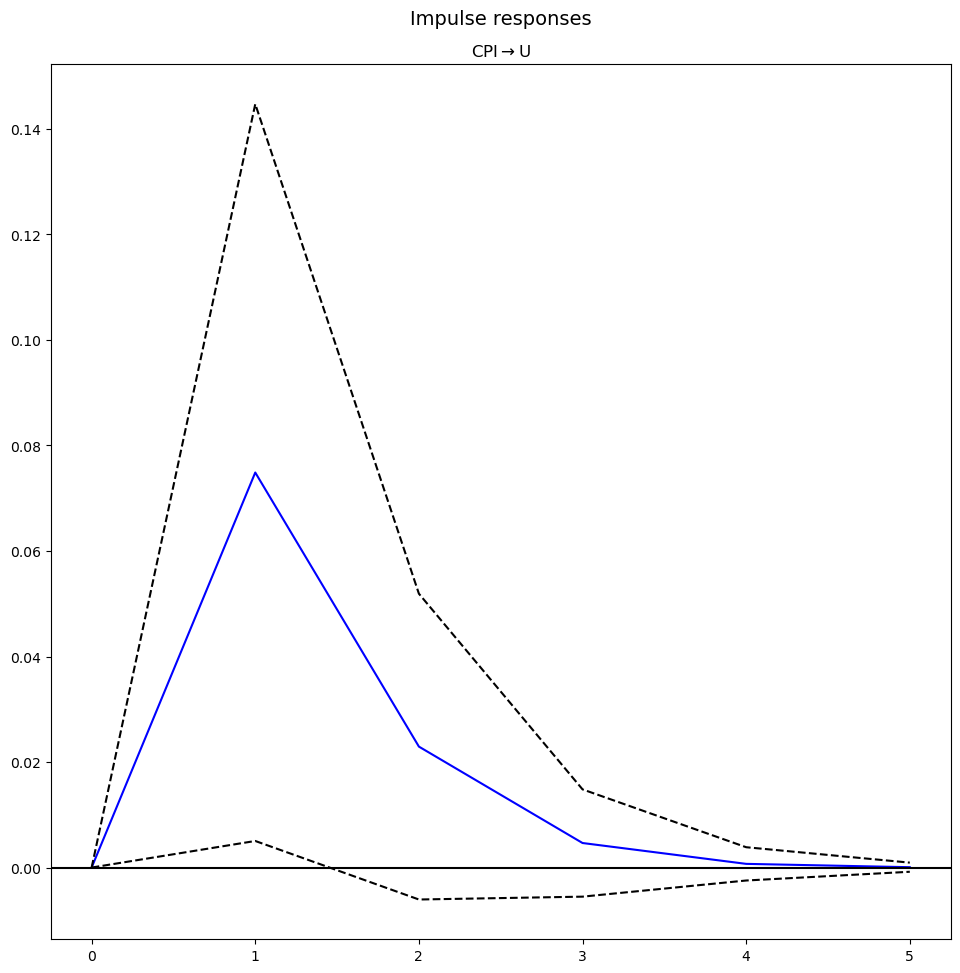

In [14]:
# 假设你的VAR模型是results
irf = results.irf(5)

# 单独呈现CPI对U的冲击
irf.plot(impulse='CPI', response='U', orth=False, signif=0.1)
plt.show()

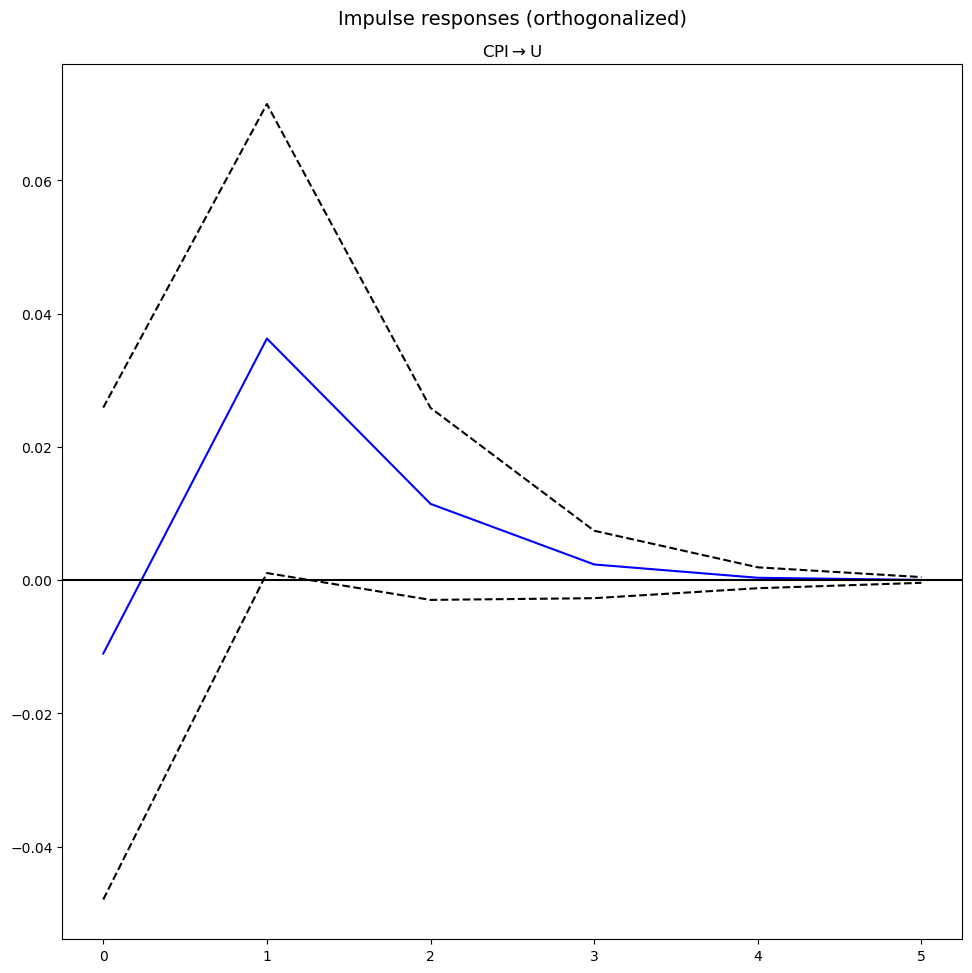

In [15]:

# 假设你的VAR模型是results
irf = results.irf(5)

# 单独呈现CPI对U的冲击
irf.plot(impulse='CPI', response='U', orth=True, signif=0.1)
plt.show()